Index(['filename', 'description'], dtype='object')


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

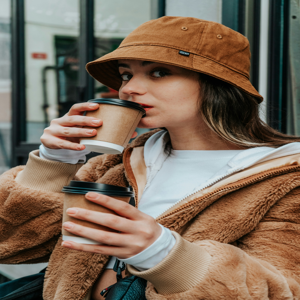

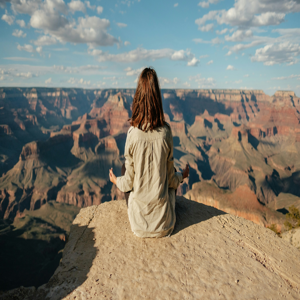

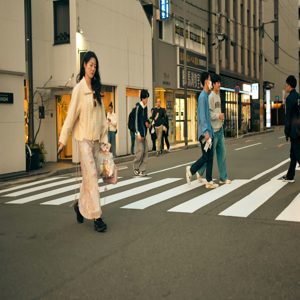

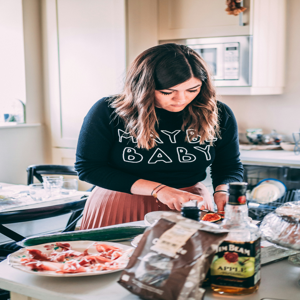

In [ ]:
import faiss
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import os
from PIL import Image
import IPython.display as display
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("data1.csv")
df.head()
print(df.columns)
model = SentenceTransformer('all-MiniLM-L6-v2')
description = df['description'].tolist()
desc_embeddings = model.encode(description,show_progress_bar=True)
desc_embeddings = np.array(desc_embeddings).astype("float32")
index = faiss.IndexFlatL2(desc_embeddings.shape[1])
index.add(desc_embeddings)

while True:
    userprompt = input("Enter your prompt (or type 'exit' to quit): ")
    if userprompt.lower() == 'exit':
        print("Exiting...")
        break

    user_embeddings = model.encode([userprompt])[0].astype("float32")
    D, I = index.search(np.array([user_embeddings]), k=1)
    match_index = I[0][0]
    matched_filename = df.iloc[match_index]['filename']

    img = Image.open(matched_filename)
    resized_img = img.resize((300, 300))
    display.display(resized_img)
